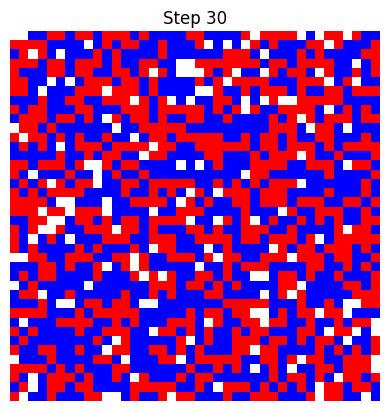

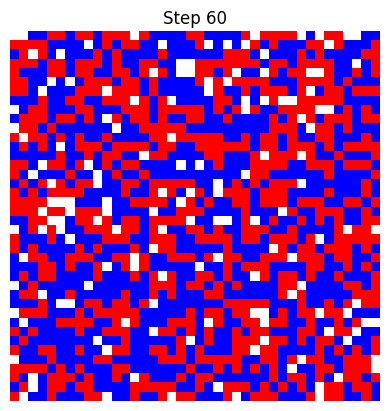

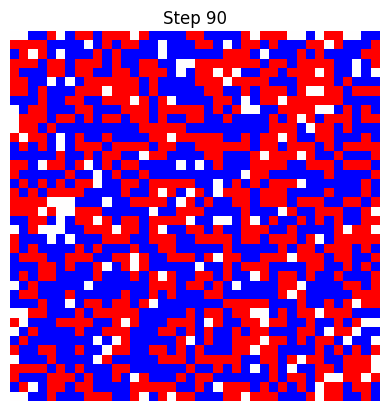

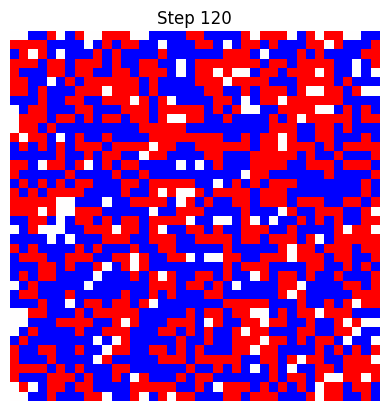

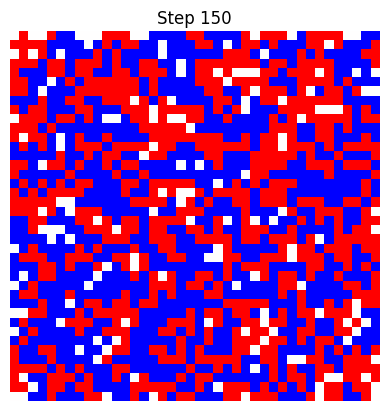

Все клетки счастливы. Моделирование завершено.


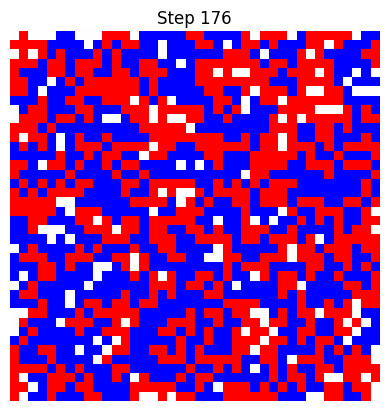

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Настройки модели
n = 40
visualize_every = 30

# Вероятности заполнения клеток
blue_ratio = 0.45
red_ratio = 0.45
empty_ratio = 0.1

# Создание начальной сетки
grid = np.random.choice([1, -1, 0], size=(n, n), p=[blue_ratio, red_ratio, empty_ratio])

# Проверка, счастлива ли клетка
def is_happy(x, y, grid):
    color = grid[x, y]
    if color == 0:
        return True

    # Нахождение всех соседей
    neighbors = grid[max(0, x-1):x+2, max(0, y-1):y+2].flatten()
    same_color_neighbors = np.sum(neighbors == color) - 1

    return same_color_neighbors >= 2

# Нахождение всех несчатных клеток
def find_unhappy(grid):
    unhappy_cells = []
    for x in range(n):
        for y in range(n):
            if grid[x, y] != 0 and not is_happy(x, y, grid):
                unhappy_cells.append((x, y))
    return unhappy_cells

# Перемещение случайной несчастной клетки в случайное пустое место
def move_cell(grid):
    unhappy_cells = find_unhappy(grid)
    empty_cells = list(zip(*np.where(grid == 0)))

    if not unhappy_cells or not empty_cells:
        return False


    from_cell = random.choice(unhappy_cells)
    to_cell = random.choice(empty_cells)


    grid[to_cell] = grid[from_cell]
    grid[from_cell] = 0

    return True

# Отображение сетки
def plot_grid(grid, step):
    plt.imshow(grid, cmap='bwr', interpolation='nearest')
    plt.title(f"Step {step}")
    plt.axis('off')
    plt.show()

# Основной цикл моделирования
step = 0
while True:
    if not move_cell(grid):  # Если больше нет несчастных клеток, завершаем
        print("Все клетки счастливы. Моделирование завершено.")
        break
    step += 1
    if step % visualize_every == 0:
        plot_grid(grid, step)

# Отображаем финальное состояние
plot_grid(grid, step)
